# <font color='maroon'>Data Features</font>


What does  the shape of the data given by the visualizaton tell us? In this lesson we continue to explore and visualize data, specifically identifying the features of data. We also look closely at the values in the data in order to identify interesting and/or missing values. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline


## Shape of data

Histograms help us visualize the shape of data. Let's use the dataset on information collected about babies whose mothers smoked and did not smoke during pregnancy. We produce histograms of the `Birthweight` and `Birthlength` columns.

In [0]:
data = pd.read_csv('smoking-and-pregnancy.csv', sep=';') #read in dataset into a dataframe, data

In [0]:
data.tail()

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
123,262,girl,3.20,50.0,N,NaN
124,279,girl,3.52,53.0,N,NaN
125,273,girl,3.40,51.0,Y,NaN
126,274,girl,3.74,52.0,Y,15.0
127,274,boy,4.08,55.0,N,NaN


Histograms are a great way to visualize the shape of data. They can show us the spread of data and where data is mostly centred. Let's observe the shapes of the `Birthweight`, `Birthlength` and `GestationalAge` using histograms.

In [0]:
#data['Birthweight'].fillna(data['Birthweight'].mean(), inplace=True)
#data['Birthlength'].fillna(data['Birthlength'].mean(), inplace=True)

Text(0.5, 0, 'Birthlength')

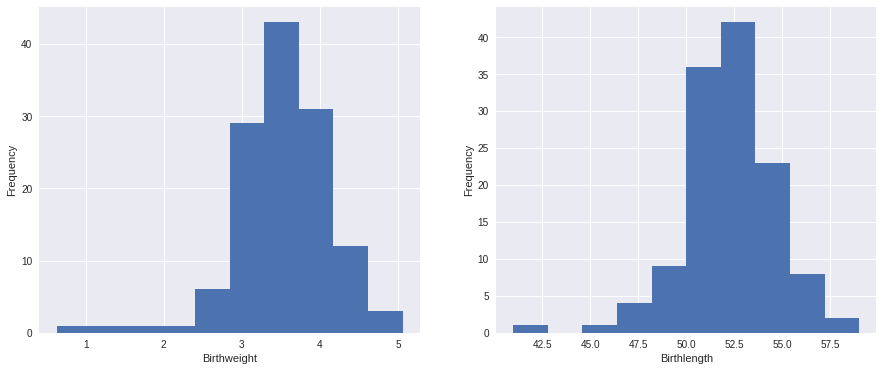

In [0]:
fig = plt.figure(figsize=(15, 6)) # figure for subplots
ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid
data['Birthweight'].plot(kind='hist', ax=ax1)
ax1.set_xlabel('Birthweight')
data['Birthlength'].plot(kind='hist', ax=ax2)
ax2.set_xlabel('Birthlength')


### Peaks in data

Observe the peaks in the data. Distributions with one peak are called unimodal, and distributions with two peaks are called bimodal. Both birthweight and birthlength are unimodal datasets. 

### Gaps in data
We observe a gap in the Birthlength data. It turns out, there we no observations for this interval.

### Extreme values

We see extreme values in the Birthweight histogram skewed towards the left.

## Box plots

We use the `describe()` to generate descriptive statistics of our dataset. We can use also a box plot to display the distribution of our data based on the minimum, first quartile, median, third quartile and maximum values. The image below indicates where each of the values are located on the box plot. The interquartile range $IQR$ is the difference between the third quartile and the first quartile.

<img src='images/simple.box.defs.gif' width='300' height='300'/>
Image courtesy of [Box Plot: Display of Distribution](http://www.physics.csbsju.edu/stats/box2.html)

Let's look at Birthweight again.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


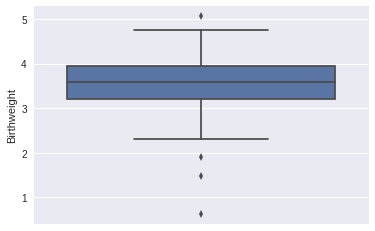

In [0]:
sns.boxplot(data['Birthweight'], orient='v') #use seaborn to plot boxplot

### Determining outliers

The box plot reveals extreme values. There are various ways to determine if your data has outliers. We can classify outliers by reasoning about them when we plot the data e.g. in a boxplot, or by using the standard deviation. Suppose we want to see which Birth weights were three standard deviations away from the mean and would like to classify those as outliers, we could apply the following function, which returns True or False depending on whether a data point is three standard deviations away from the mean.

In [0]:
d = data['Birthweight'].sub(data['Birthweight'].mean()).div(data['Birthweight'].std()).abs().lt(3) 
#what did we just do there? .sub(data...) subtracts the mean from each entry in the Birthweight column
#.div(data['Birthweight'].std()) #divide the result by the standard deviation
#.abs() #change the result into an absolute value
#.lt(3) #check if it is less than 3 standard deviations away from the mean. lt -> less than
for i in range(len(d)):
    if d[i] == False:
        print (data['Birthweight'].mean(), data['Birthweight'].iloc[i]) # print mean Birthweight & the location of the outliers

3.538359374999999 0.63
3.538359374999999 1.49


We observe two outliers.

## Identifying missing values

Missing values can be shown as "not available", "NA", or any identifier that shows that data is missing. We can use the isnull() function to find these values.

In [0]:
data.isnull().tail() #check for missing values in the tail end of data

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
123,False,False,False,False,False,True
124,False,False,False,False,False,True
125,False,False,False,False,False,True
126,False,False,False,False,False,False
127,False,False,False,False,False,True


Notice that there are missing values, `NaN`, in the dataset. Now let's count the missing values.

In [0]:
data.isnull().sum(axis=0) # count the missing values in each column

GestationalAge        0
Sex                   0
Birthweight           0
Birthlength           2
Smoking               0
CigarettesPerDay    105
dtype: int64

CigarettesPerDay is the only variable with missing values, a total of 104.

### Dealing with missing values

How do we handle missing values? Firstly, we have to identify the pattern of missing data. If a respondent in a survey chooses to not answer certain questions, a pattern could be observed in their responses. Data may also be missing at random. Depending on the nature of the relationship between the missing variable and other variables, we can apply certain techniques to treat missing values. See this link as well, which gives detailed techniques how to deal with missing values: <a href='https://support.sas.com/documentation/cdl/en/statug/63962/HTML/default/viewer.htm#statug_mi_sect019.htm'>The MI Procedure</a>.

If a respondent in a survey enters the same response to all the questions, replacing missing values with the same response is a reasonable thing to do. A word of caution: dropping missing values when the sample set is small will affect the results of the statistical test so it's best to investigate if it's a true error. Else, keep it in.

#### Dropping missing values in Pandas

If the results are crucial for a test, dropping these values is an option. The `dropna()` lets us drop rows with missing values.

Starting from the original dataset:

In [0]:
data

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
0,281,boy,3.35,54.0,Y,NaN
1,265,girl,3.72,48.0,Y,NaN
2,274,girl,3.10,50.0,N,NaN
3,291,girl,4.58,57.0,Y,15.0
4,290,boy,3.20,49.0,N,NaN
5,284,girl,4.46,53.5,Y,5.0
6,279,girl,3.55,52.0,Y,10.0
7,287,girl,3.26,53.5,Y,10.0
8,274,girl,3.50,53.0,Y,10.0
9,293,boy,3.10,51.0,Y,12.0


We drop all the missing values:

In [0]:
data.dropna() # returns the dataset minus all NaNs

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
3,291,girl,4.58,57.0,Y,15.0
5,284,girl,4.46,53.5,Y,5.0
6,279,girl,3.55,52.0,Y,10.0
7,287,girl,3.26,53.5,Y,10.0
8,274,girl,3.50,53.0,Y,10.0
9,293,boy,3.10,51.0,Y,12.0
11,293,boy,3.74,53.0,Y,15.0
12,278,girl,3.76,50.0,Y,5.0
14,277,boy,3.55,52.0,Y,2.0
15,288,girl,3.77,53.0,Y,15.0


#### Filling in missing values with Pandas

We could transform the missing values for counting purposes especially when we need to group data. Suppose we want visualise the missing values? Let's use the `DataFrame.fillna()` function and fill in those missing values with a `-1`. We're assuming `-1` is a safe number and won't affect the other values already in the table. 
<p></p>
Before filling in the missing values, we get the results below when grouping data for a count of smokers vs. non-smokers

In [0]:
data.groupby(['Smoking']).count()

,GestationalAge,Sex,Birthweight,Birthlength,CigarettesPerDay
Smoking,,,,,
N,94,94,94,94,0
Y,34,34,34,32,23


When we fill the missing values with a -1, we get the results below:

In [0]:
df = data.fillna(-1)

In [0]:
df.groupby(['Smoking']).count()

,GestationalAge,Sex,Birthweight,Birthlength,CigarettesPerDay
Smoking,,,,,
N,94,94,94,94,94
Y,34,34,34,34,34


We create a new dataframe to contain the difference between the `NaN` values, which we've replaced with `-1`'s and the count without the `NaN` values.

In [0]:
df = (df.groupby(['Smoking']).count() - data.groupby(['Smoking']).count())

In [0]:
df

,GestationalAge,Sex,Birthweight,Birthlength,CigarettesPerDay
Smoking,,,,,
N,0,0,0,0,94
Y,0,0,0,2,11


Here we see that the number of missing values grouped according to `Smoking` matches the original count.

### Exercise

Another method to replace missing values is to impute them by replacing them with the mean. You now know how to calculate means and replace missing values. For this exercise, replace the missing `Birthlength` data points in the data set with the mean of the `Birthlength`.

In [0]:
# your answer

<b>Practice Challenge</b>: Boxplots indicate where the median value lies. We can calculate the mean value by first sorting a list of observations and finding the middle value. Write a Python function that accepts as input a list of numbers and computes the median.

In [0]:
#your answer